### 1. Prepare test dataset
Use MNIST Test images directly

In [141]:
data_dir="code/tf-mnist/data/mnist"
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(data_dir, one_hot=True)
test_images = mnist.test.images
test_labels = mnist.test.labels
print('Shape of test set:', test_images.shape)
print('Shape of test set labels:', test_labels.shape)
digits = ['0','1','2','3','4','5','6','7','8','9']

Extracting code/tf-mnist/data/mnist/train-images-idx3-ubyte.gz
Extracting code/tf-mnist/data/mnist/train-labels-idx1-ubyte.gz
Extracting code/tf-mnist/data/mnist/t10k-images-idx3-ubyte.gz
Extracting code/tf-mnist/data/mnist/t10k-labels-idx1-ubyte.gz
('Shape of test set:', (10000, 784))
('Shape of test set labels:', (10000, 10))


### 2. Show test images
Randomly select and show an image from MNIST Test images

4808


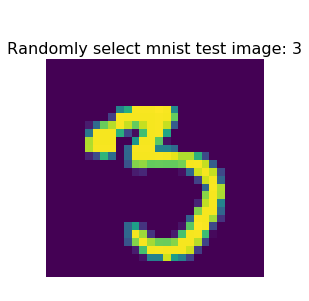

In [142]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
def show(idx, title):
  plt.figure()
  plt.imshow(test_images[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import numpy as np
import random
rando = random.randint(0,len(test_images)-1)
print rando
# get digit mapping to test label vector
test_cls = np.argmax(test_labels, axis=1)
show(rando, 'Randomly select mnist test image: {}'.format(digits[test_cls[rando]]))

### 3. Invoke RESTful API of MNIST model service
Invoke the running MNIST model inference service, show socres and prediction result comparing with input image

[[-9.45941, -10.3765, -2.3368, 11.9541, -16.8212, 6.72099, -15.582, -2.11773, 1.63442, 0.037915]]


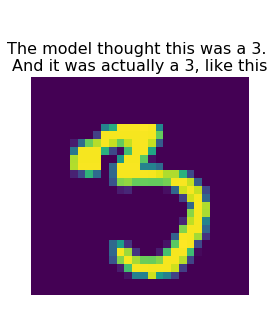

In [143]:
model_api='http://172.21.11.136:8501/v1/models/mnist'

#!pip install -q requests
import requests
import json
data = json.dumps({"signature_name": "predict_images", "inputs": test_images[rando].reshape(1, 784).tolist()})
#print data
#import pickle
#print pickle.dumps(test_images[rando])
headers = {"content-type": "application/json"}
metadata=requests.get(model_api + '/metadata')
json_response = requests.post(model_api+':predict', data=data, headers=headers)
scores = json.loads(json_response.text)['outputs']
print scores
predicted_digits_idx = np.argmax(scores[0])
show(rando, 'The model thought this was a {}. \nAnd it was actually a {}, like this'.format(digits[predicted_digits_idx], test_cls[rando]))
